# MultiGroupDirectLiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.24.4', '2.0.3', '0.20.1', '1.8.3']


## Test data
We generate two datasets consisting of 6 variables.

In [2]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X1.head()

,x0,x1,x2,x3,x4,x5
0,2.239321,15.340724,4.104399,0.548814,14.176947,9.249925
1,2.155632,16.630954,4.767220,0.715189,12.775458,9.189045
2,2.284116,15.910406,4.139736,0.602763,14.201794,9.273880
3,2.343420,14.921457,3.519820,0.544883,15.580067,9.723392
4,1.314940,11.055176,3.146972,0.423655,7.604743,5.312976


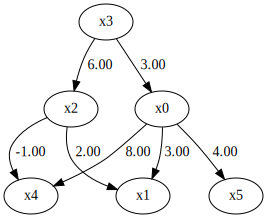

In [3]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [4]:
x3 = np.random.uniform(size=1000)
x0 = 3.5*x3 + np.random.uniform(size=1000)
x2 = 6.5*x3 + np.random.uniform(size=1000)
x1 = 3.5*x0 + 2.5*x2 + np.random.uniform(size=1000)
x5 = 4.5*x0 + np.random.uniform(size=1000)
x4 = 8.5*x0 - 1.5*x2 + np.random.uniform(size=1000)
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X2.head()

,x0,x1,x2,x3,x4,x5
0,1.913337,14.568170,2.893918,0.374794,12.115455,9.358286
1,2.013935,15.857260,3.163377,0.428686,12.657021,9.242911
2,3.172835,24.734385,5.142203,0.683057,19.605722,14.666783
3,2.990395,20.878961,4.113485,0.600948,19.452091,13.494380
4,0.248702,2.268163,0.532419,0.070483,1.854870,1.130948


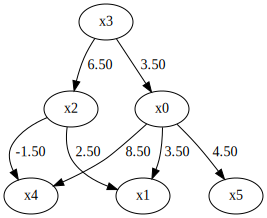

In [5]:
m = np.array([[0.0, 0.0, 0.0, 3.5, 0.0, 0.0],
              [3.5, 0.0, 2.5, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.5, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.5, 0.0,-1.5, 0.0, 0.0, 0.0],
              [4.5, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

We create a list variable that contains two datasets.

In [6]:
X_list = [X1, X2]

## Causal Discovery
To run causal discovery for multiple datasets, we create a `MultiGroupDirectLiNGAM` object and call the `fit` method.

In [7]:
model = lingam.MultiGroupDirectLiNGAM()
model.fit(X_list)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [8]:
model.causal_order_

[3, 0, 5, 2, 1, 4]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery. As you can see from the following, DAG in each dataset is correctly estimated.

[[ 0.     0.     0.     3.006  0.     0.   ]
 [ 2.962  0.     2.015  0.     0.     0.   ]
 [ 0.     0.     0.     5.97   0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 8.01   0.    -1.006  0.     0.     0.   ]
 [ 3.998  0.     0.     0.     0.     0.   ]]


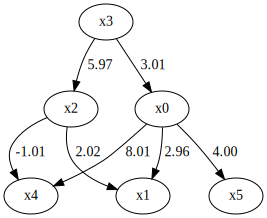

In [9]:
print(model.adjacency_matrices_[0])
make_dot(model.adjacency_matrices_[0])

[[ 0.     0.     0.     3.483  0.     0.   ]
 [ 3.526  0.     2.486  0.     0.     0.   ]
 [ 0.     0.     0.     6.503  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 8.478  0.    -1.484  0.     0.     0.   ]
 [ 4.494  0.     0.     0.     0.     0.   ]]


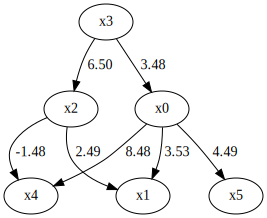

In [10]:
print(model.adjacency_matrices_[1])
make_dot(model.adjacency_matrices_[1])

To compare, we run DirectLiNGAM with single dataset concatenating two datasets.

In [11]:
X_all = pd.concat([X1, X2])
print(X_all.shape)

(2000, 6)


In [12]:
model_all = lingam.DirectLiNGAM()
model_all.fit(X_all)

model_all.causal_order_

[1, 5, 2, 3, 0, 4]

You can see that the causal structure cannot be estimated correctly for a single dataset.

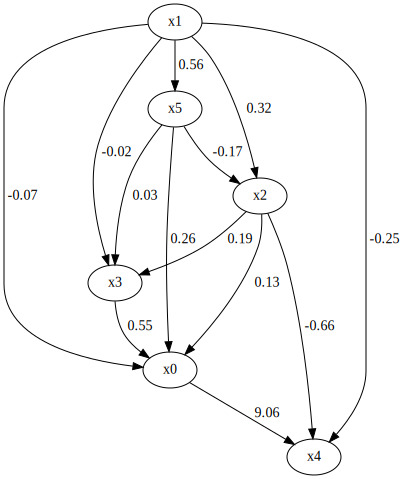

In [13]:
make_dot(model_all.adjacency_matrix_)

## Independence between error variables
To check if the LiNGAM assumption is broken, we can get p-values of independence between error variables. The value in the i-th row and j-th column of the obtained matrix shows the p-value of the independence of the error variables $e_i$ and $e_j$.

In [14]:
p_values = model.get_error_independence_p_values(X_list)
print(p_values[0])

[[0.    0.939 0.07  0.838 0.467 0.818]
 [0.939 0.    0.195 0.755 0.053 0.254]
 [0.07  0.195 0.    0.851 0.374 0.507]
 [0.838 0.755 0.851 0.    0.422 0.755]
 [0.467 0.053 0.374 0.422 0.    0.581]
 [0.818 0.254 0.507 0.755 0.581 0.   ]]


In [15]:
print(p_values[1])

[[0.    0.521 0.973 0.285 0.459 0.606]
 [0.521 0.    0.805 0.785 0.078 0.395]
 [0.973 0.805 0.    0.807 0.378 0.129]
 [0.285 0.785 0.807 0.    0.913 0.99 ]
 [0.459 0.078 0.378 0.913 0.    0.269]
 [0.606 0.395 0.129 0.99  0.269 0.   ]]


## Bootstrapping
In `MultiGroupDirectLiNGAM`, bootstrap can be executed in the same way as normal `DirectLiNGAM`.

In [16]:
results = model.bootstrap(X_list, n_sampling=100)

## Causal Directions
The `bootstrap` method returns a list of multiple `BootstrapResult`, so we can get the result of bootstrapping from the list. We can get the same number of results as the number of datasets, so we specify an index when we access the results. We can get the ranking of the causal directions extracted by `get_causal_direction_counts()`.

In [17]:
cdc = results[0].get_causal_direction_counts(n_directions=8, min_causal_effect=0.01)
print_causal_directions(cdc, 100)

x0 <--- x3  (100.0%)
x1 <--- x0  (100.0%)
x1 <--- x2  (100.0%)
x2 <--- x3  (100.0%)
x4 <--- x0  (100.0%)
x4 <--- x2  (100.0%)
x5 <--- x0  (100.0%)
x1 <--- x3  (4.0%)


In [18]:
cdc = results[1].get_causal_direction_counts(n_directions=8, min_causal_effect=0.01)
print_causal_directions(cdc, 100)

x0 <--- x3  (100.0%)
x1 <--- x0  (100.0%)
x1 <--- x2  (100.0%)
x5 <--- x0  (100.0%)
x2 <--- x3  (100.0%)
x4 <--- x0  (100.0%)
x4 <--- x2  (100.0%)
x4 <--- x3  (12.0%)


## Directed Acyclic Graphs
Also, using the `get_directed_acyclic_graph_counts()` method, we can get the ranking of the DAGs extracted. In the following sample code, `n_dags` option is limited to the dags of the top 3 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.01 or more.

In [19]:
dagc = results[0].get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01)
print_dagc(dagc, 100)

DAG[0]: 87.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
DAG[1]: 4.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
	x5 <--- x2 
	x5 <--- x3 
DAG[2]: 4.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x1 <--- x3 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 


In [20]:
dagc = results[1].get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01)
print_dagc(dagc, 100)

DAG[0]: 60.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
DAG[1]: 8.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
	x5 <--- x2 
DAG[2]: 7.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x4 <--- x3 
	x5 <--- x0 


## Probability
Using the get_probabilities() method, we can get the probability of bootstrapping.

In [21]:
prob = results[0].get_probabilities(min_causal_effect=0.01)
print(prob)

[[0.   0.   0.   1.   0.   0.  ]
 [1.   0.   1.   0.04 0.   0.02]
 [0.01 0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [1.   0.   1.   0.02 0.   0.  ]
 [1.   0.   0.04 0.04 0.   0.  ]]


## Total Causal Effects
Using the `get_total_causal_effects()` method, we can get the list of total causal effect. The total causal effects we can get are dictionary type variable.
We can display the list nicely by assigning it to pandas.DataFrame. Also, we have replaced the variable index with a label below.

In [22]:
causal_effects = results[0].get_total_causal_effects(min_causal_effect=0.01)
df = pd.DataFrame(causal_effects)

labels = [f'x{i}' for i in range(X1.shape[1])]
df['from'] = df['from'].apply(lambda x : labels[x])
df['to'] = df['to'].apply(lambda x : labels[x])
df

,from,to,effect,probability
0,x3,x0,3.005604,1.00
1,x0,x1,2.963048,1.00
2,x2,x1,2.016516,1.00
3,x3,x1,20.943993,1.00
4,x3,x2,5.969457,1.00
5,x0,x4,8.011896,1.00
6,x2,x4,-1.007165,1.00
7,x3,x4,18.061596,1.00
8,x0,x5,4.001221,1.00
9,x3,x5,12.026086,1.00


We can easily perform sorting operations with pandas.DataFrame.

In [23]:
df.sort_values('effect', ascending=False).head()

,from,to,effect,probability
3,x3,x1,20.943993,1.0
7,x3,x4,18.061596,1.0
9,x3,x5,12.026086,1.0
5,x0,x4,8.011896,1.0
4,x3,x2,5.969457,1.0


And with pandas.DataFrame, we can easily filter by keywords. The following code extracts the causal direction towards x1.

In [24]:
df[df['to']=='x1'].head()

,from,to,effect,probability
1,x0,x1,2.963048,1.00
2,x2,x1,2.016516,1.00
3,x3,x1,20.943993,1.00
11,x5,x1,0.092263,0.02


Because it holds the raw data of the total causal effect (the original data for calculating the median), it is possible to draw a histogram of the values of the causal effect, as shown below.

(array([ 4.,  8., 10., 19., 16., 14., 14.,  8.,  6.,  1.]),
 array([2.941, 2.955, 2.969, 2.984, 2.998, 3.012, 3.026, 3.04 , 3.055,
        3.069, 3.083]),
 <BarContainer object of 10 artists>)

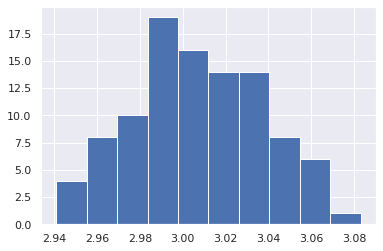

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from_index = 3
to_index = 0
plt.hist(results[0].total_effects_[:, to_index, from_index])

## Bootstrap Probability of Path
Using the `get_paths()` method, we can explore all paths from any variable to any variable and calculate the bootstrap probability for each path. The path will be output as an array of variable indices. For example, the array `[3, 0, 1]` shows the path from variable X3 through variable X0 to variable X1.

In [26]:
from_index = 3 # index of x3
to_index = 1 # index of x0

pd.DataFrame(results[0].get_paths(from_index, to_index))

,path,effect,probability
0,"[3, 0, 1]",8.905047,1.00
1,"[3, 2, 1]",12.049228,1.00
2,"[3, 1]",-0.733971,0.04
3,"[3, 0, 5, 1]",1.096850,0.02
4,"[3, 0, 2, 1]",0.493177,0.01
